In [46]:
import pandas as pd 
!pip  install openpyxl
!pip install seaborn



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\tihit\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\tihit\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [53]:
data1=pd.read_csv('new_house_price.csv', encoding='utf-8')
new_df=pd.DataFrame()

data1.head()

,geo,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AT,Austria,NaN,NaN,NaN,NaN,NaN,76.80,81.60,87.57,92.10,95.33,100,108.53,114.26,119.64,126.60,136.31,153.26
1,BE,Belgium,72.49,79.56,85.76,89.54,89.12,91.92,95.61,97.75,98.90,98.35,100,102.64,106.37,109.42,113.78,118.60,127.06
2,BG,Bulgaria,80.09,91.86,118.42,147.97,117.79,105.81,99.98,98.07,95.92,97.29,100,107.02,116.30,123.96,131.42,137.41,149.33
3,CY,Cyprus,97.06,108.57,121.32,128.17,119.76,112.90,111.09,107.70,103.29,101.47,100,100.27,102.52,104.32,108.20,107.98,104.33
4,CZ,Czech,NaN,NaN,NaN,100.80,96.90,95.20,95.30,93.90,93.90,96.20,100,107.20,119.70,130.00,141.90,153.90,184.20


In [ ]:

# Check if it loaded correctly
print("Shape:", data1.shape)
print("Columns:", data1.columns.tolist())
print(data1.head())


Shape: (29, 19)
Columns: ['geo', 'country', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

First few rows:
  geo   country   2005    2006    2007    2008    2009    2010    2011  \
0  AT   Austria    NaN     NaN     NaN     NaN     NaN   76.80   81.60   
1  BE   Belgium  72.49   79.56   85.76   89.54   89.12   91.92   95.61   
2  BG  Bulgaria  80.09   91.86  118.42  147.97  117.79  105.81   99.98   
3  CY    Cyprus  97.06  108.57  121.32  128.17  119.76  112.90  111.09   
4  CZ     Czech    NaN     NaN     NaN  100.80   96.90   95.20   95.30   

     2012    2013    2014  2015    2016    2017    2018    2019    2020  \
0   87.57   92.10   95.33   100  108.53  114.26  119.64  126.60  136.31   
1   97.75   98.90   98.35   100  102.64  106.37  109.42  113.78  118.60   
2   98.07   95.92   97.29   100  107.02  116.30  123.96  131.42  137.41   
3  107.70  103.29  101.47   100  100.27  102.52  104.32  1

In [ ]:

data1 = data1.drop(['2005', '2006', '2007', '2008', '2009', '2010'], axis=1)
data1 = data1[data1['country'] != 'United Kingdom']

Your columns:
['geo', 'country', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


In [ ]:
#data from inflation
file_path = r'Inflation-data______new.xlsx'
df = pd.read_excel(file_path, sheet_name=0)
df = df.drop(columns=[col for col in df.columns if isinstance(col, int) and (col < 2011 or col > 2021)])

# Displaying column names after keeping only years from 2010 to 2021
print("\n  Columns after keeping only years 2010 - 2021 ===")
print(list(df.columns))
countries_to_keep = [
    "Belgium", "Bulgaria", "Czechia", "Denmark", "Germany", "Estonia", "Ireland",
    "Greece", "Spain", "France", "Italy", "Latvia",
    "Lithuania", "Luxembourg", "Hungary", "Malta", "Netherlands", "Austria",
    "Poland", "Portugal", "Slovenia", "Slovakia", "Finland",
    "Sweden", "Iceland", "Norway"
]

df = df[df["Country"].isin(countries_to_keep)]
print(df["Country"].unique())
df = df.reset_index(drop=True)
df_2= df.drop(columns=["Country Code", "IMF Country Code", "Indicator Type"])
df_2 = df_2.rename(columns={'Country':'country'})
df_2.columns


  Columns after keeping only years 2010 - 2021 ===
['Country Code', 'IMF Country Code', 'Country', 'Indicator Type', 'Series Name', 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
['Austria' 'Belgium' 'Bulgaria' 'Denmark' 'Estonia' 'Finland' 'France'
 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Latvia'
 'Lithuania' 'Luxembourg' 'Malta' 'Netherlands' 'Norway' 'Poland'
 'Portugal' 'Slovenia' 'Spain' 'Sweden']


Index([    'country', 'Series Name',          2011,          2012,
                2013,          2014,          2015,          2016,
                2017,          2018,          2019,          2020,
                2021],
      dtype='object')

In [ ]:
#data from earnings
df = pd.read_csv('Earnings.csv')
# Drop unwanted year columns
newdf = df.drop(columns=['2005','2006','2007','2008','2009','2022','2023','2024'])
df.head()

,TIME,2005,2006,2007,2008,2009,2010,2011,2012,2013,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,GEO (Labels),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Belgium,"21,273.34","21,880.46","22,396.96","23,405.30","24,323.59","24,873.45","25,519.86","26,287.51","26,609.37",...,"26,953.59","27,574.37","28,238.77","29,240.96","30,188.71","30,539.81","31,063.95","32,889.21","35,438.98","36,672.38"
2,Bulgaria,:,:,:,"2,605.86","2,951.37","3,202.34","3,396.45","3,598.45","3,798.06",...,"4,339.15","4,689.05","5,132.74","5,447.10","6,093.02","6,612.77","7,456.68","8,569.19","9,890.39","11,073.90"
3,Czechia,"5,587.37","6,394.53","6,962.34","8,345.91","8,240.09","8,832.96","9,257.22","9,311.44","8,973.79",...,"9,017.25","9,446.75","10,263.30","11,256.33","11,992.68","11,974.40","13,969.74","15,703.05","17,265.60","17,290.99"
4,Denmark,"26,440.34","27,243.49","28,469.57","29,595.89","30,962.07","32,349.16","33,153.43","33,617.32","33,873.44",...,"34,689.46","35,021.65","35,558.92","36,307.24","37,133.59","37,878.85","39,315.61","40,710.04","42,357.77","43,912.73"


In [ ]:

newdf = newdf.reset_index(drop=True)
# Drop specific rows (indices 11 and 13)
newdf = newdf.drop(index=[11,13])
newdf = newdf.rename(columns={'TIME':'country'})
# Drop the first row
newdf_3= newdf.drop(index=0).reset_index(drop=True)
print(newdf_3.head())
print("data1 cols:", data1.columns.tolist())
print("df cols:", df_2.columns.tolist())
print("new_df cols:", newdf_3.columns.tolist())


    country       2010       2011       2012       2013       2014       2015  \
0   Belgium  24,873.45  25,519.86  26,287.51  26,609.37  26,775.94  26,953.59   
1  Bulgaria   3,202.34   3,396.45   3,598.45   3,798.06   4,033.73   4,339.15   
2   Czechia   8,832.96   9,257.22   9,311.44   8,973.79   8,694.95   9,017.25   
3   Denmark  32,349.16  33,153.43  33,617.32  33,873.44  34,330.38  34,689.46   
4   Germany  25,374.06  26,088.04  26,729.62  27,171.02  27,791.42  28,410.71   

        2016       2017       2018       2019       2020       2021  
0  27,574.37  28,238.77  29,240.96  30,188.71  30,539.81  31,063.95  
1   4,689.05   5,132.74   5,447.10   6,093.02   6,612.77   7,456.68  
2   9,446.75  10,263.30  11,256.33  11,992.68  11,974.40  13,969.74  
3  35,021.65  35,558.92  36,307.24  37,133.59  37,878.85  39,315.61  
4  28,986.32  29,468.63  30,419.87  31,486.26  31,292.95  32,850.20  


Index(['country', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [17]:
# Ensure consistent data types and strip spaces
data1['country'] = data1['country'].astype(str).str.strip()
df_2['country'] = df_2['country'].astype(str).str.strip()
newdf_3['country'] = newdf_3['country'].astype(str).str.strip()

# Merge house price and inflation
merged = pd.merge(data1, df_2, on='country', how='inner', suffixes=('_house_price', '_inflation'))

# Merge earnings
merged = pd.merge(merged, newdf_3, on='country', how='inner')

# Rename columns
new_columns = []
for col in merged.columns:
    col_str = str(col)  # Ensure column name is a string
    if col_str.endswith('_x'):
        new_columns.append(col_str.replace('_x', '_house_price'))
    elif col_str.endswith('_y'):
        new_columns.append(col_str.replace('_y', '_earning'))
    elif col_str.isdigit():  # Numeric columns (e.g., years)
        new_columns.append(f"{col_str}_inflation")
    else:
        new_columns.append(col_str)  # Keep other columns unchanged

merged.columns = new_columns

# Print final column names
print("✅ Final columns:", merged.columns.tolist())

✅ Final columns: ['geo', 'country', '2011_house_price', '2012_house_price', '2013_house_price', '2014_house_price', '2015_house_price', '2016_house_price', '2017_house_price', '2018_house_price', '2019_house_price', '2020_house_price', '2021_house_price', 'Series Name', '2011_inflation', '2012_inflation', '2013_inflation', '2014_inflation', '2015_inflation', '2016_inflation', '2017_inflation', '2018_inflation', '2019_inflation', '2020_inflation', '2021_inflation', '2010_inflation', '2011_earning', '2012_earning', '2013_earning', '2014_earning', '2015_earning', '2016_earning', '2017_earning', '2018_earning', '2019_earning', '2020_earning', '2021_earning']


In [19]:
merged.head(4)

,geo,country,2011_house_price,2012_house_price,2013_house_price,2014_house_price,2015_house_price,2016_house_price,2017_house_price,2018_house_price,...,2012_earning,2013_earning,2014_earning,2015_earning,2016_earning,2017_earning,2018_earning,2019_earning,2020_earning,2021_earning
0,AT,Austria,81.60,87.57,92.10,95.33,100,108.53,114.26,119.64,...,"26,893.06","27,520.54","27,965.34","28,524.14","30,601.53","31,083.14","31,640.93","32,325.12","33,032.37","33,712.20"
1,BE,Belgium,95.61,97.75,98.90,98.35,100,102.64,106.37,109.42,...,"26,287.51","26,609.37","26,775.94","26,953.59","27,574.37","28,238.77","29,240.96","30,188.71","30,539.81","31,063.95"
2,BG,Bulgaria,99.98,98.07,95.92,97.29,100,107.02,116.30,123.96,...,"3,598.45","3,798.06","4,033.73","4,339.15","4,689.05","5,132.74","5,447.10","6,093.02","6,612.77","7,456.68"
3,DE,Germany,86.80,89.80,92.60,95.50,100,107.50,114.10,121.70,...,"26,729.62","27,171.02","27,791.42","28,410.71","28,986.32","29,468.63","30,419.87","31,486.26","31,292.95","32,850.20"


In [ ]:
merged = merged.drop(['2010_inflation'], axis=1)
merged.columns

In [29]:
# Convert wide to long for house prices, inflation, and earnings
house_price = merged.melt(id_vars=['geo','country'], 
                          value_vars=[col for col in merged.columns if 'house_price' in col],
                          var_name='year', value_name='house_price')

inflation = merged.melt(id_vars=['geo','country'], 
                        value_vars=[col for col in merged.columns if 'inflation' in col],
                        var_name='year', value_name='inflation')

earning = merged.melt(id_vars=['geo','country'], 
                      value_vars=[col for col in merged.columns if 'earning' in col],
                      var_name='year', value_name='earning')

# Clean up year column
for df in [house_price, inflation, earning]:
    df['year'] = df['year'].str.extract(r'(\d{4})').astype(int)
df['earning'] = df['earning'].replace({',': ''}, regex=True).astype(float)

# Merge them together
df_long = house_price.merge(inflation, on=['geo','country','year']).merge(earning, on=['geo','country','year'])
df_long.head(4)

,geo,country,year,house_price,inflation,earning
0,AT,Austria,2011,81.60,1.833637,26375.67
1,BE,Belgium,2011,95.61,1.807151,25519.86
2,BG,Bulgaria,2011,99.98,5.941922,3396.45
3,DE,Germany,2011,86.80,1.079937,26088.04


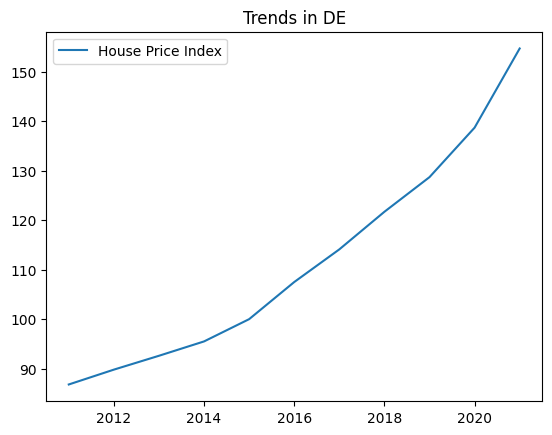

In [ ]:
import matplotlib.pyplot as plt
country = "DE"  # Example: Germany
subset = df_long[df_long['geo']==country]
plt.plot(subset['year'], subset['house_price'], label='House Price Index')
plt.legend()
plt.title(f"Trends in {country}")
plt.show()


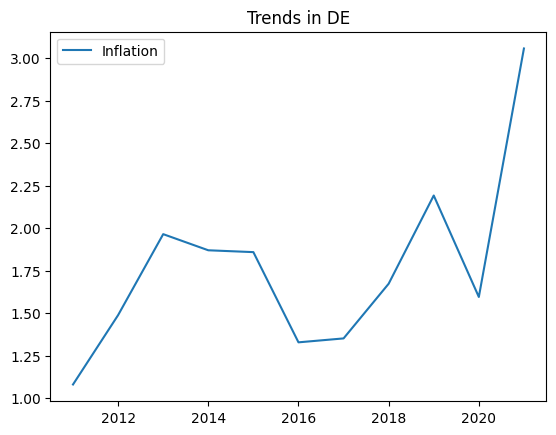

In [51]:
plt.plot(subset['year'], subset['inflation'], label='Inflation')
plt.legend()
plt.title(f"Trends in {country}")
plt.show()

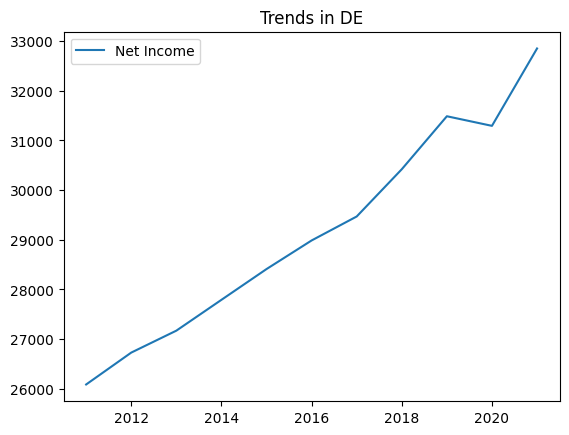

In [52]:
plt.plot(subset['year'], subset['earning'], label='Net Income')
plt.legend()
plt.title(f"Trends in {country}")
plt.show()

In [31]:
df_long['hpi_growth'] = df_long.groupby('geo')['house_price'].pct_change() * 100
df_long['income_growth'] = df_long.groupby('geo')['earning'].pct_change() * 100


In [32]:
df_long['real_hpi'] = df_long['house_price'] / (1 + df_long['inflation']/100)


In [ ]:
df_long['affordability_index'] = df_long['house_price'] / df_long['earning']
df_long

,geo,country,year,house_price,inflation,earning,hpi_growth,income_growth,real_hpi,affordability_index
0,AT,Austria,2011,81.60,1.833637,26375.67,NaN,NaN,80.130694,0.003094
1,BE,Belgium,2011,95.61,1.807151,25519.86,NaN,NaN,93.912853,0.003746
2,BG,Bulgaria,2011,99.98,5.941922,3396.45,NaN,NaN,94.372462,0.029437
3,DE,Germany,2011,86.80,1.079937,26088.04,NaN,NaN,85.872630,0.003327
4,EE,Estonia,2011,69.32,5.399596,8324.26,NaN,NaN,65.768753,0.008327
...,...,...,...,...,...,...,...,...,...,...
237,NO,Norway,2021,137.66,16.911350,46935.39,9.158671,10.345624,117.747336,0.002933
238,PL,Poland,2021,147.77,5.052506,11134.57,9.168144,-2.125286,140.662994,0.013271
239,PT,Portugal,2021,168.84,1.398792,13502.54,9.401931,4.389325,166.510860,0.012504
240,SE,Sweden,2021,134.46,2.976153,35485.73,10.113832,6.350797,130.573920,0.003789


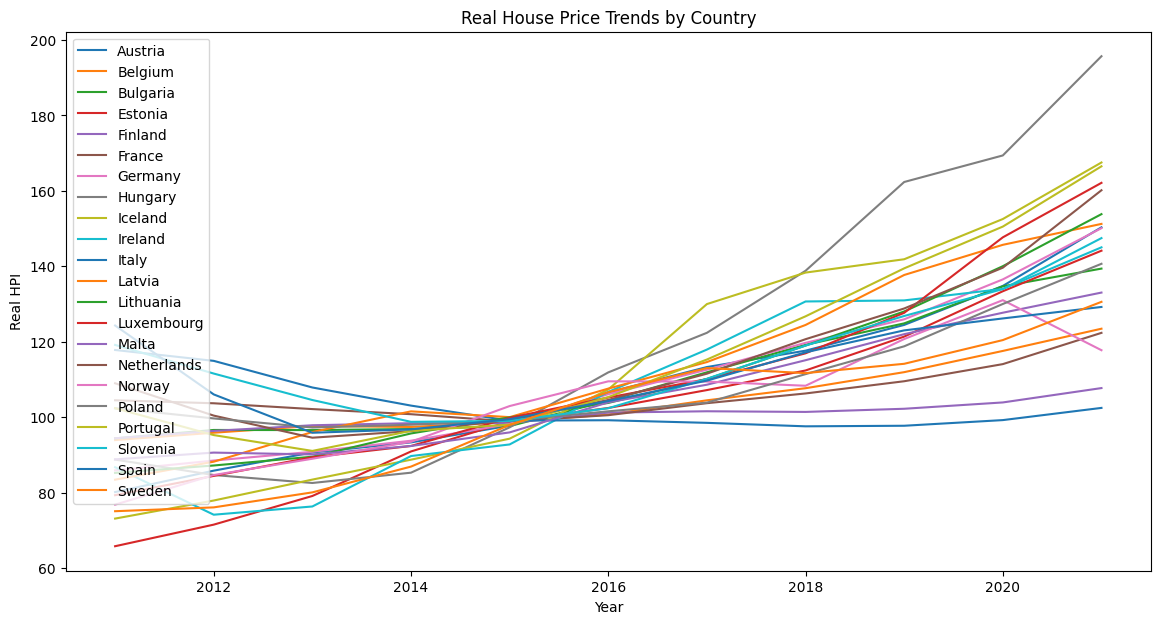

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))

for country, df_country in df_long.groupby('country'):
    plt.plot(df_country['year'], df_country['real_hpi'], label=country)

plt.title('Real House Price Trends by Country')
plt.xlabel('Year')
plt.ylabel('Real HPI')
plt.legend()
plt.show()


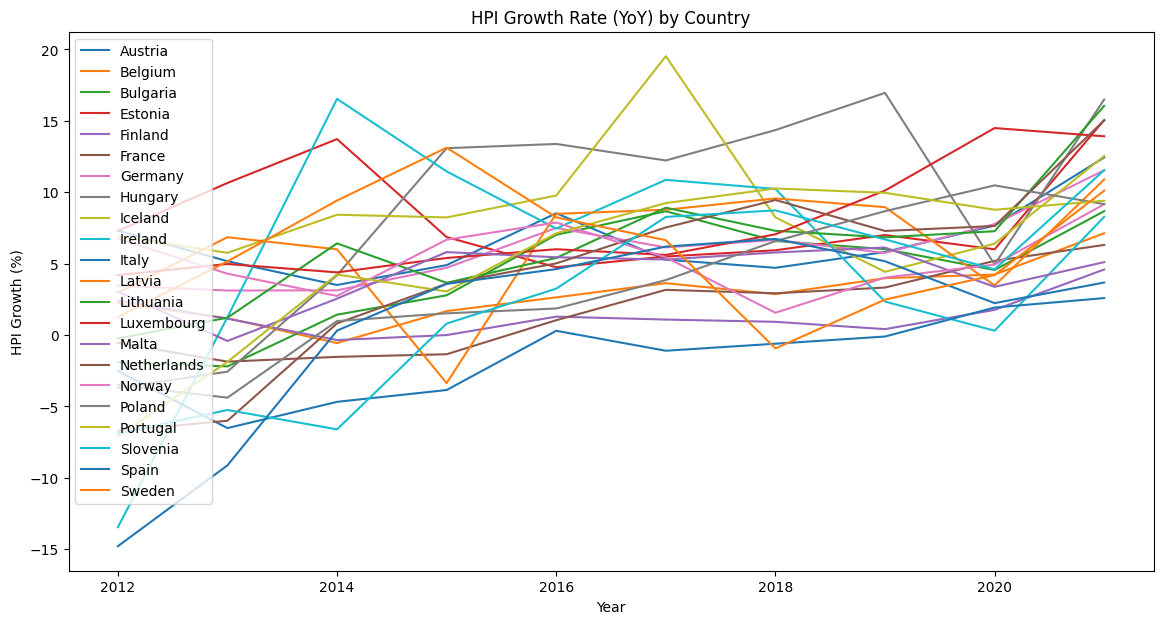

In [41]:
plt.figure(figsize=(14,7))

for country, df_country in df_long.groupby('country'):
    plt.plot(df_country['year'], df_country['hpi_growth'], label=country)

plt.title('HPI Growth Rate (YoY) by Country')
plt.xlabel('Year')
plt.ylabel('HPI Growth (%)')
plt.legend()
plt.show()


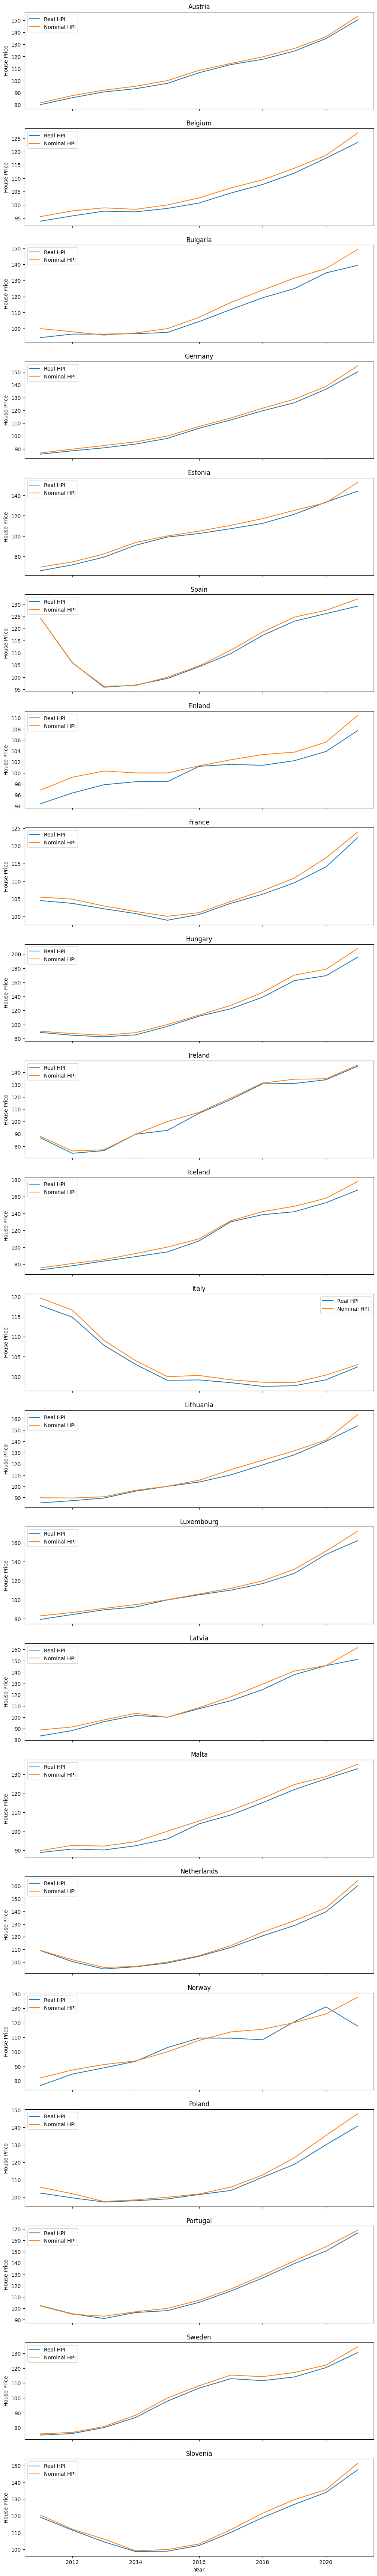

In [42]:
countries = df_long['country'].unique()
fig, axes = plt.subplots(len(countries), 1, figsize=(12, 4*len(countries)), sharex=True)

for ax, country in zip(axes, countries):
    df_country = df_long[df_long['country'] == country]
    ax.plot(df_country['year'], df_country['real_hpi'], label='Real HPI')
    ax.plot(df_country['year'], df_country['house_price'], label='Nominal HPI')
    ax.set_title(country)
    ax.set_ylabel('House Price')
    ax.legend()

plt.xlabel('Year')
plt.show()


In [43]:
summary = df_long.groupby('country').agg(
    avg_hpi_growth=('hpi_growth','mean'),
    avg_income_growth=('income_growth','mean'),
    avg_affordability=('affordability_index','mean')
).sort_values('avg_hpi_growth', ascending=False)

print(summary)


             avg_hpi_growth  avg_income_growth  avg_affordability
country                                                          
Iceland            9.023159           6.929479           0.002989
Hungary            8.936393           5.127729           0.016020
Estonia            8.276088           6.294286           0.009021
Luxembourg         7.617306           2.176380           0.002789
Austria            6.533539           2.496889           0.003655
Lithuania          6.284621           8.156142           0.014713
Latvia             6.260878           7.861374           0.015616
Germany            5.977596           2.340821           0.003806
Sweden             5.970397           1.309614           0.003076
Ireland            5.527740           2.537729           0.003155
Norway             5.346815           0.645271           0.002368
Portugal           5.310610           1.210891           0.009639
Netherlands        4.366764           2.559629           0.003290
Malta     

In [35]:
corr = df_long[['house_price','inflation','earning']].corr()
print(corr)


             house_price  inflation   earning
house_price     1.000000   0.276392  0.048764
inflation       0.276392   1.000000 -0.041248
earning         0.048764  -0.041248  1.000000


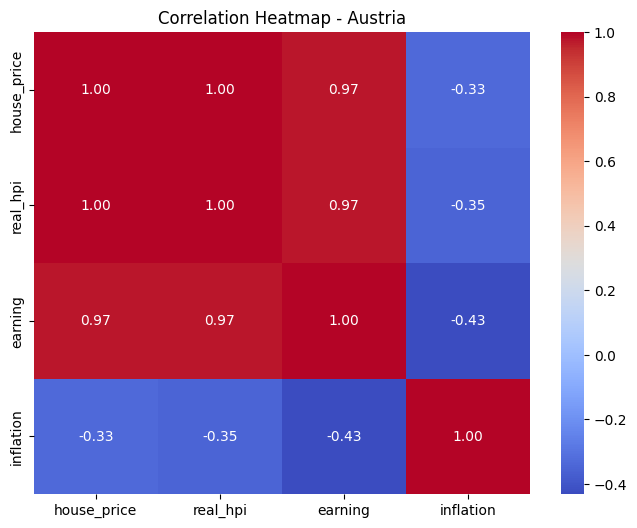

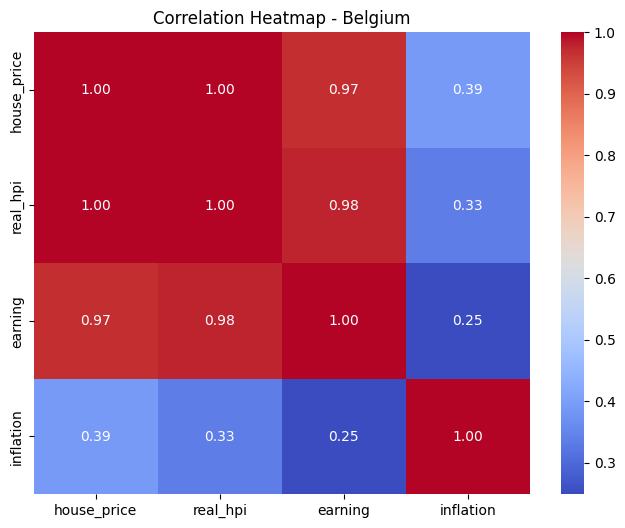

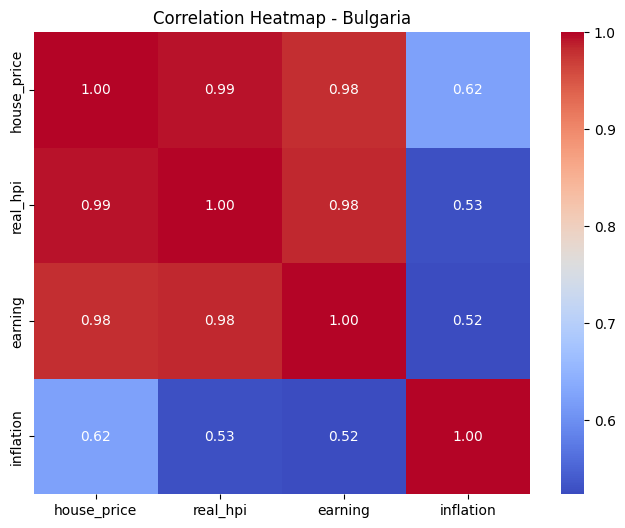

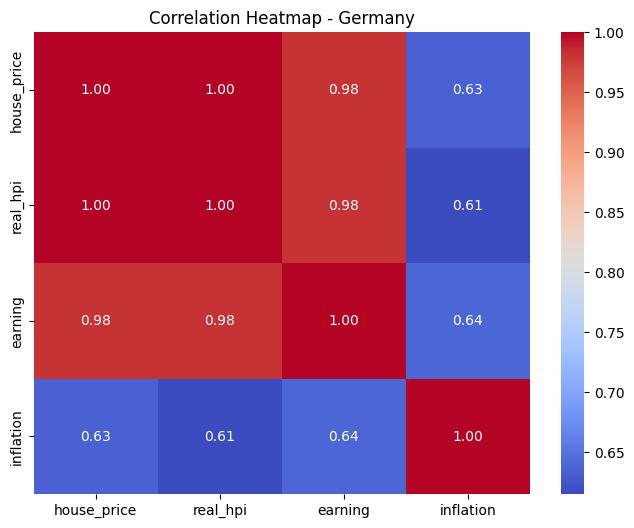

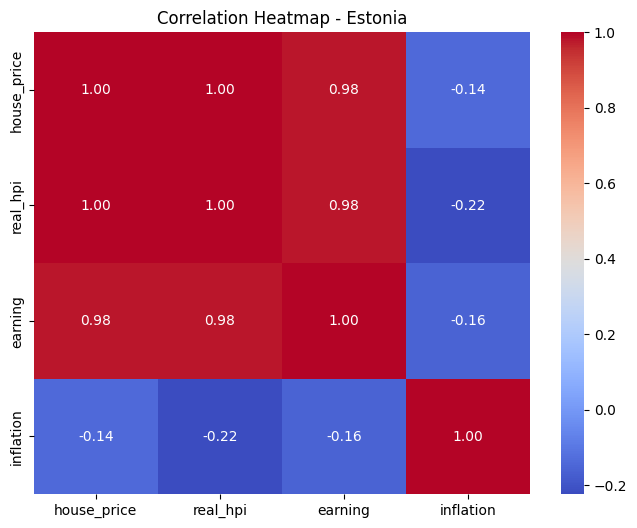

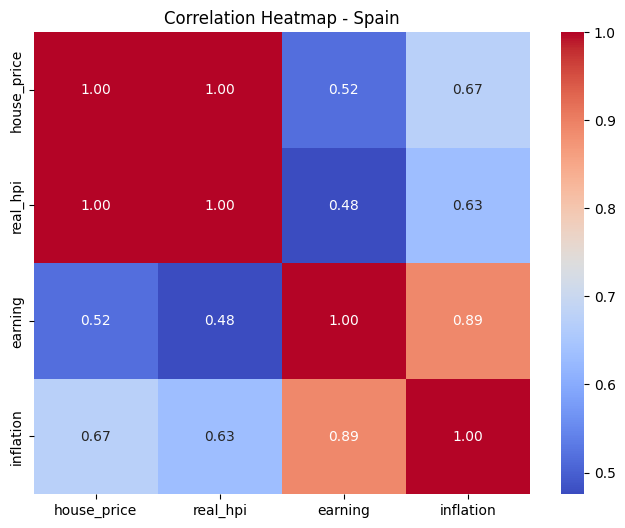

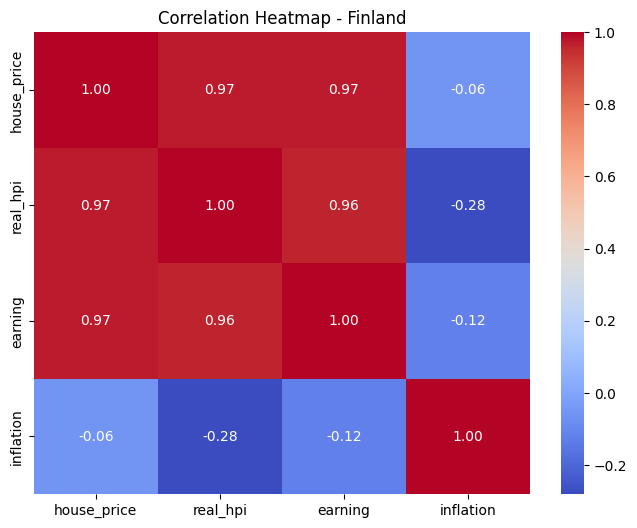

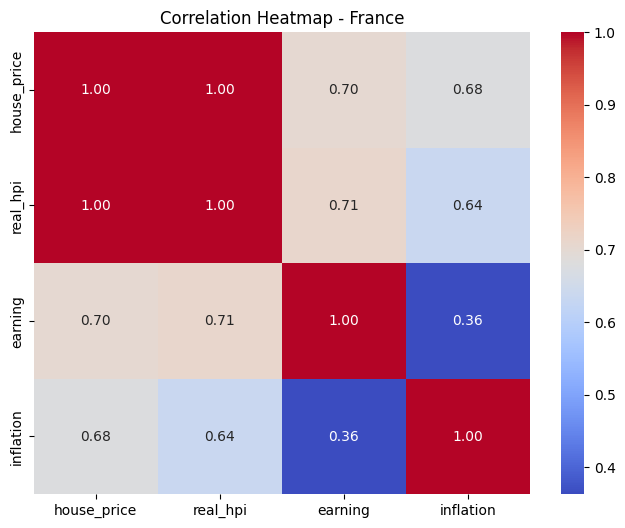

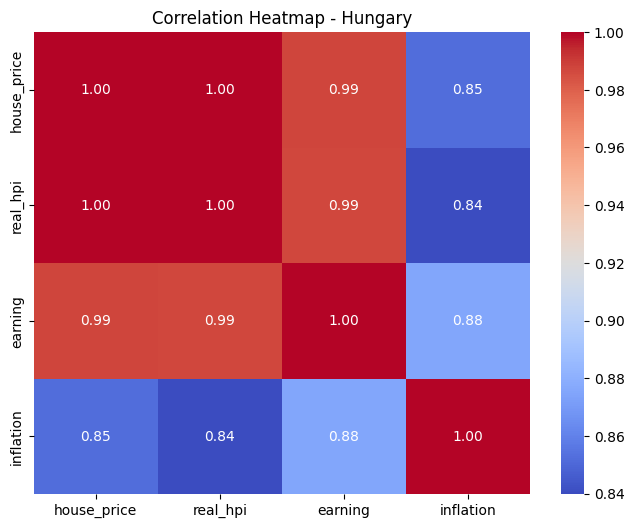

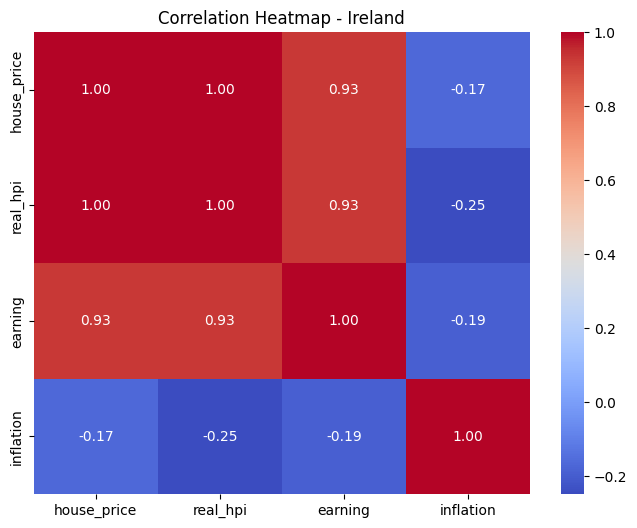

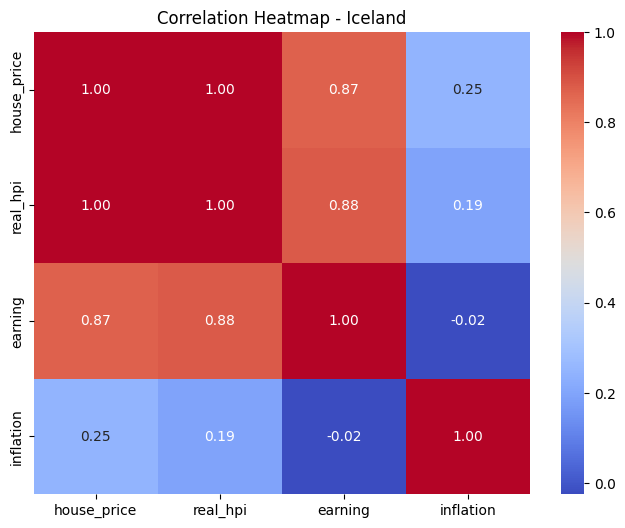

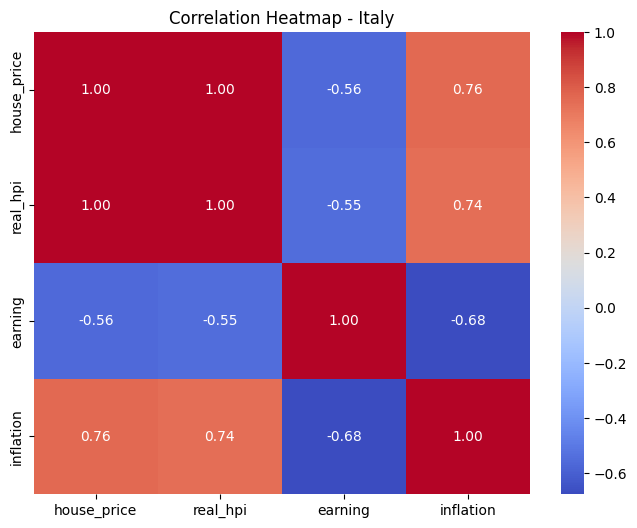

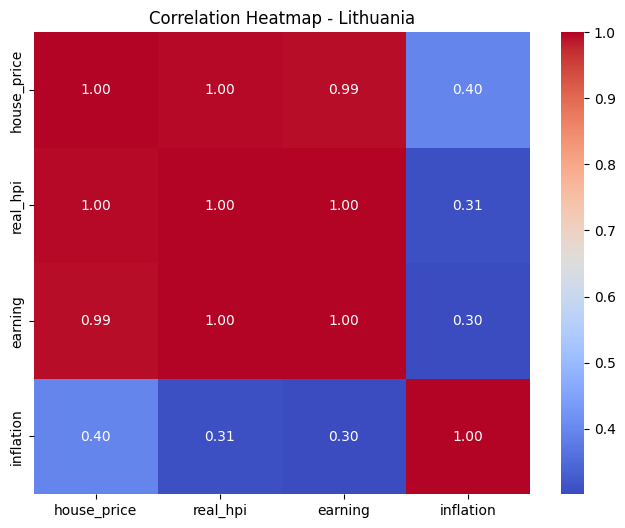

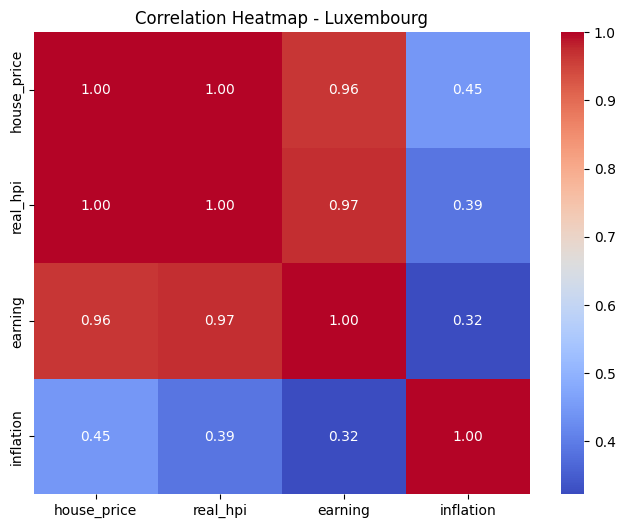

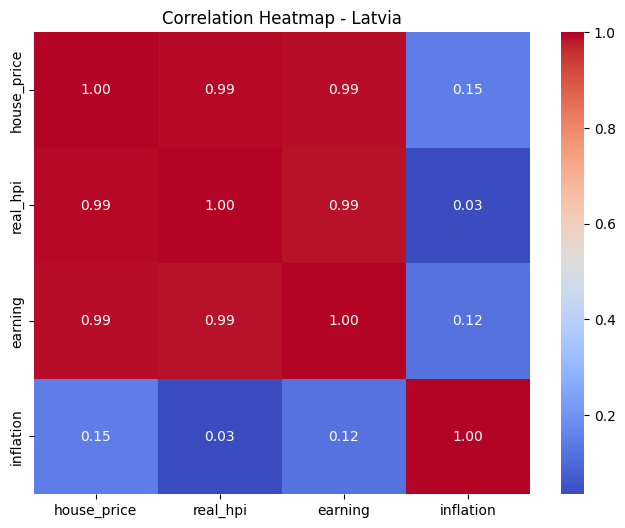

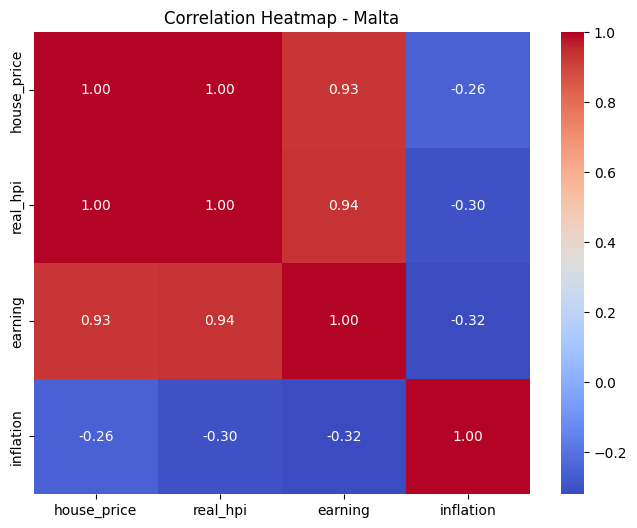

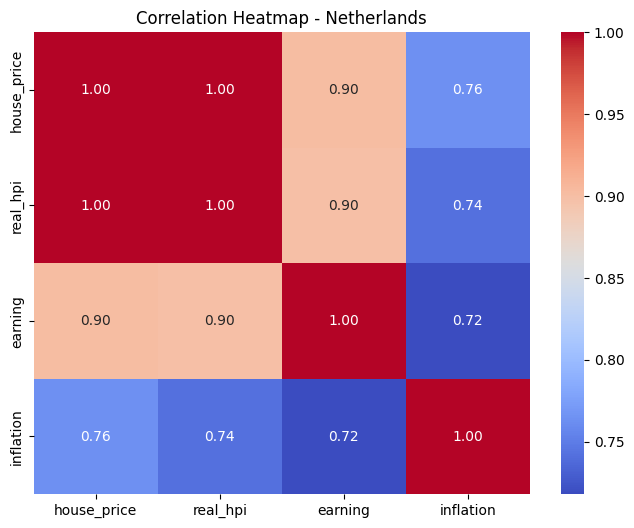

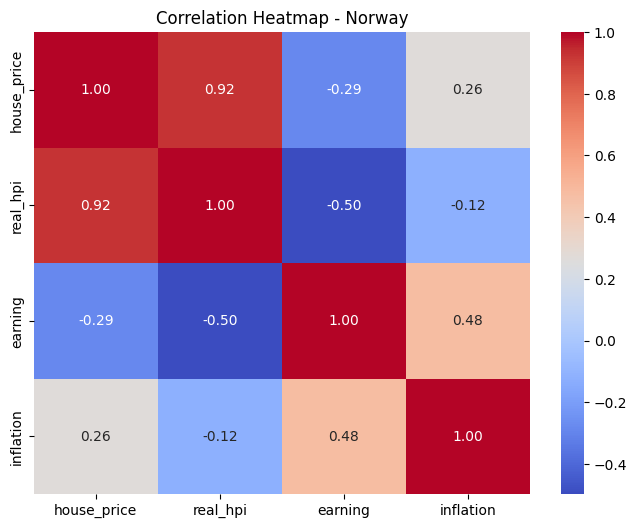

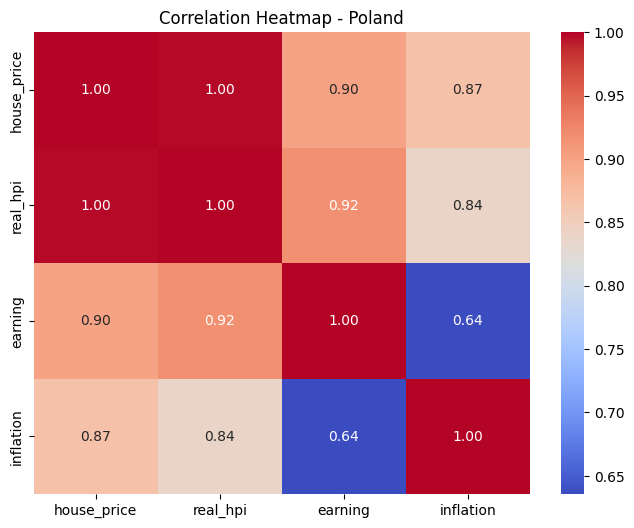

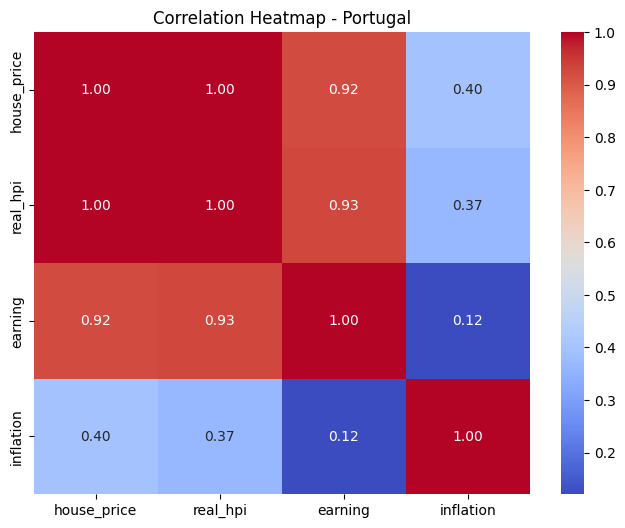

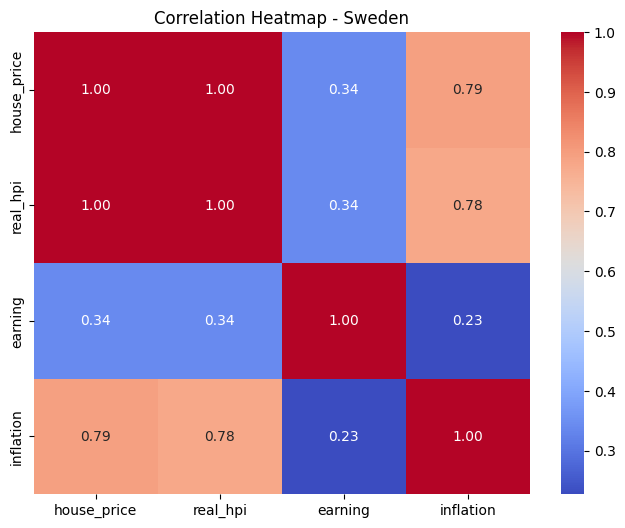

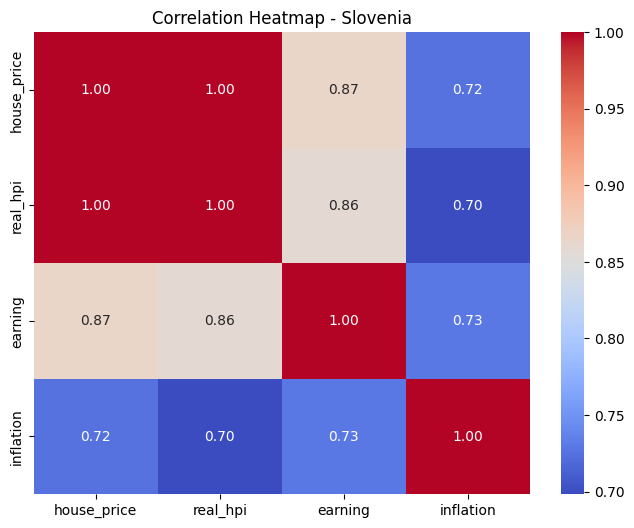

In [47]:
countries = df_long['country'].unique()
import seaborn as sns
for country in countries:
    df_country = df_long[df_long['country'] == country]
    corr = df_country[['house_price', 'real_hpi', 'earning', 'inflation']].corr()
    
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Heatmap - {country}')
    plt.show()


In [36]:
cross_country = df_long.groupby('country')['hpi_growth'].mean().sort_values(ascending=False)
print(cross_country)

country
Iceland        9.023159
Hungary        8.936393
Estonia        8.276088
Luxembourg     7.617306
Austria        6.533539
Lithuania      6.284621
Latvia         6.260878
Germany        5.977596
Sweden         5.970397
Ireland        5.527740
Norway         5.346815
Portugal       5.310610
Netherlands    4.366764
Malta          4.213728
Bulgaria       4.163950
Poland         3.524512
Belgium        2.903182
Slovenia       2.516180
France         1.669097
Finland        1.329214
Spain          0.862323
Italy         -1.452385
Name: hpi_growth, dtype: float64


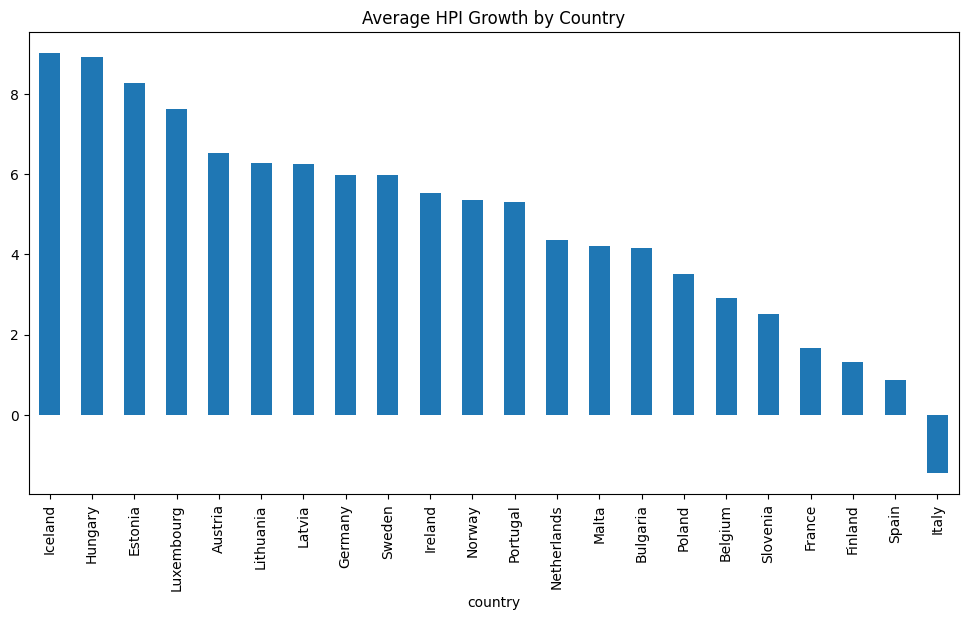

In [37]:
cross_country.plot(kind='bar', figsize=(12,6), title="Average HPI Growth by Country")
plt.show()
